In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков

In [2]:
%matplotlib inline

In [7]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 14.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
df = pd.read_excel("/content/drive/MyDrive/Study MePHI/сем6/НС/BHW_1/Concrete_Data.xls", sheet_name="A - aaup")

In [5]:
df


,Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),,,,,,,,
540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601


In [ ]:
df.A7.shape


(1073,)

In [ ]:
m = df.A7.mean()
m

355.08853681267476

In [ ]:
df.A7.var()

2904.289728547383

In [ ]:
s = df.A7.std()
s

53.89146248291452

In [ ]:
df.A7.skew() #ассимерия

0.8202883369737385

In [ ]:
df.A8.kurtosis() #экцесс

0.9859226807733354

In [ ]:
n = len(df.A7)


In [ ]:
#БДЗ 2
#доверительный интервал для мат ожидания

quantile_1 = 0.01
quantile_2 = 0.05
quantile_3 = 0.1
t_rv = stats.t(n-1)

a = m - (s * t_rv.ppf(1 - quantile_3 / 2)) / n**(1/2)
b = m + (s * t_rv.ppf(1 - quantile_3 / 2)) / n**(1/2)

print("a = %.3f; b = %.3f" % (a, b))

a = 352.381; b = 357.796


In [ ]:
#БДЗ 2
#доверительный интервал для дисперсии

quantile_1 = 0.01
quantile_2 = 0.05
quantile_3 = 0.1
f_rv = stats.chi2(n-1)

a = ((n-1) * (s**2)) / f_rv.ppf(1 - quantile_3 / 2)
b = ((n-1) * (s**2)) / f_rv.ppf(quantile_3 / 2)

print("a = %.3f; b = %.3f" % (a, b))

a = 2708.994; b = 3122.793


In [ ]:
#БДЗ 2
#доверительный интервал для разности мат ожиданий
n1 = len(df.A7)
n2 = len(df.A8)
s1 = df.A7.std()
s2 = df.A8.std()
m1 = df.A7.mean()
m2 = df.A8.mean()

s = (((n1 - 1)*(s1**2) + (n2 - 1)*(s2**2))/(n1 + n2 - 2))**(1/2)
t_rv = stats.t(n1 + n2 - 2)
a = (m1 - m2) - t_rv.ppf(1 - quantile_3 / 2) * s * (((1/n1) + (1/n2))**(1/2))
b = (m1 - m2) + t_rv.ppf(1 - quantile_3 / 2) * s * (((1/n1) + (1/n2))**(1/2))

print("a = %.3f; b = %.3f" % (a, b))
m1 - m2

a = -78.242; b = -67.646


-72.94408201304753

In [ ]:
#БДЗ 2
#доверительный интервал для отношения дисперсий

n1 = len(df.A7)
n2 = len(df.A8)
s1 = df.A7.std()
s2 = df.A8.std()

fh_rv = stats.f(n2-1,n1-1)

a = ((s1**2) * fh_rv.ppf(quantile_3 / 2))/ (s2**2)
b = ((s1**2) * fh_rv.ppf(1 - quantile_3 / 2))/ (s2**2)

print("a = %.3f; b = %.3f" % (a, b))


a = 0.320; b = 0.391


In [ ]:
k = math.ceil(1 + math.log2(n))
m = df.A7.min()

12

In [ ]:
df_1 =  pd.cut(df['A7'], bins=12).value_counts(sort=False).values # частота
df_1

array([  3,  27,  98, 186, 267, 209, 162,  69,  28,  17,   5,   2])

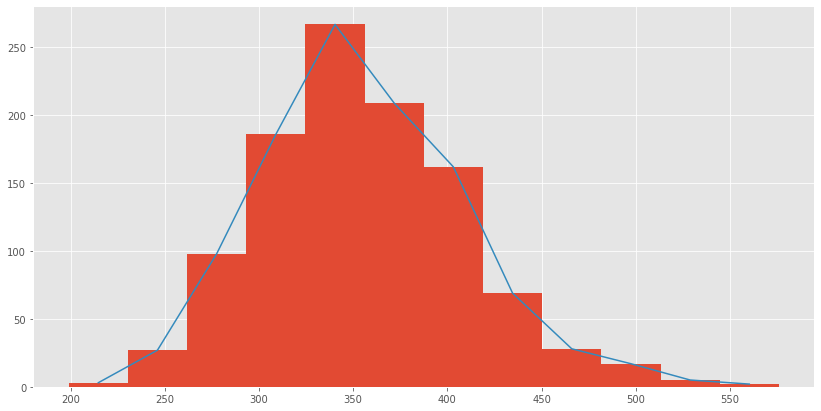

In [ ]:
#frequency polygon

plt.figure(figsize=(14,7))

count,division = np.histogram(df['A7'], bins=12)
ar = []
for i in range(len(division)-1):
  ar.append(((division[i + 1] - division[i]) / 2) + division[i])

df['A7'].hist(bins=k, density=False)
plt.plot(ar, count)

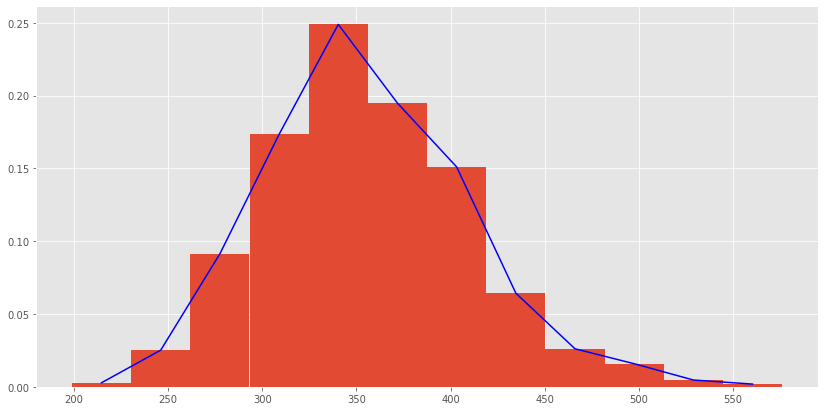

In [ ]:
#Histogram and polygon of relative frequencies
plt.figure(figsize=(14,7))
y = pd.cut(df['A7'], bins=12).value_counts(sort=False, normalize = True).values
plt.bar(ar, y, width = 31.4)
plt.plot(ar, y, color="blue")


In [ ]:
y

array([0.0027959 , 0.02516309, 0.09133271, 0.17334576, 0.24883504,
       0.19478099, 0.15097856, 0.06430568, 0.02609506, 0.01584343,
       0.00465983, 0.00186393])

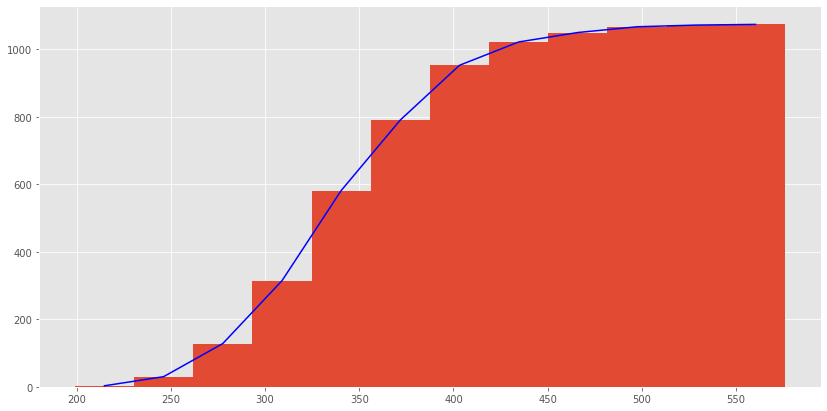

In [ ]:
#Гистограмма и полигон накопленных частот

plt.figure(figsize=(14,7))
y1 = pd.cut(df['A7'], bins=12).value_counts(sort=False).cumsum()
plt.bar(ar, y1, width = 31.4)
plt.plot(ar, y1, color="blue")



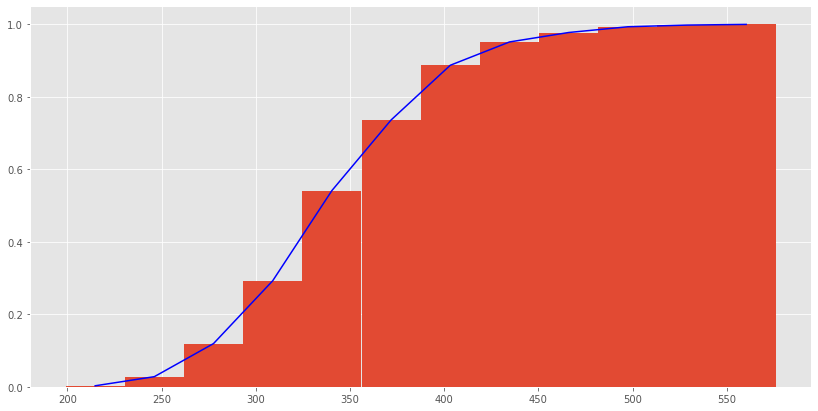

In [ ]:
#Гистограмма и полигон накопленных относительных частот
plt.figure(figsize=(14,7))
y2 = pd.cut(df['A7'], bins=12).value_counts(sort=False, normalize = True).values.cumsum()
plt.bar(ar, y2, width = 31.4)
plt.plot(ar, y2, color="blue")


In [ ]:
df_1 =  pd.cut(df['A7'], bins=12).value_counts(sort=False).values.cumsum() #накопленная частота
df_1

array([   3,   30,  128,  314,  581,  790,  952, 1021, 1049, 1066, 1071,
       1073])

In [ ]:
df_1 =  pd.cut(df['A7'], bins=12).value_counts(sort=False, normalize = True).values.cumsum() #накопленная относительная частота
df_1

array([0.0027959 , 0.02795899, 0.11929171, 0.29263747, 0.54147251,
       0.73625349, 0.88723206, 0.95153774, 0.97763281, 0.99347623,
       0.99813607, 1.        ])

In [ ]:
pd.cut(df['A7'], bins=12).value_counts(sort=False, normalize = True) #относителная частота

(198.623, 230.417]    0.002796
(230.417, 261.833]    0.025163
(261.833, 293.25]     0.091333
(293.25, 324.667]     0.173346
(324.667, 356.083]    0.248835
(356.083, 387.5]      0.194781
(387.5, 418.917]      0.150979
(418.917, 450.333]    0.064306
(450.333, 481.75]     0.026095
(481.75, 513.167]     0.015843
(513.167, 544.583]    0.004660
(544.583, 576.0]      0.001864
Name: A7, dtype: float64

In [ ]:
pd.cut(df['A7'], bins=12)

0         (356.083, 387.5]
1       (418.917, 450.333]
2       (324.667, 356.083]
3         (387.5, 418.917]
4        (293.25, 324.667]
               ...        
1068     (293.25, 324.667]
1069      (356.083, 387.5]
1070    (324.667, 356.083]
1071     (261.833, 293.25]
1072      (356.083, 387.5]
Name: A7, Length: 1073, dtype: category
Categories (12, interval[float64]): [(198.623, 230.417] < (230.417, 261.833] < (261.833, 293.25] <
                                     (293.25, 324.667] ... (450.333, 481.75] < (481.75, 513.167] <
                                     (513.167, 544.583] < (544.583, 576.0]]

Text(0, 0.5, 'Frequency of student')

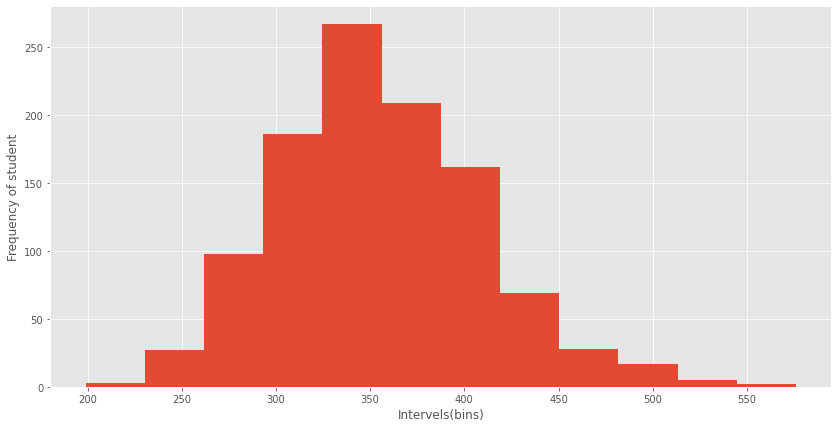

In [ ]:
plt.figure(figsize=(14,7))
df['A7'].hist(bins=k, density=False)

plt.xlabel("Intervels(bins)")
plt.ylabel("Frequency of student")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


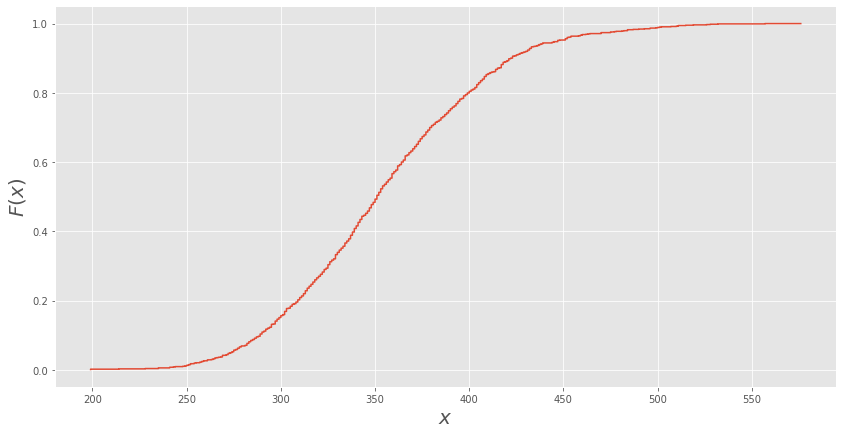

In [ ]:
#Эмпирическая функция распределения
plt.figure(figsize=(14,7))

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(df['A7'])   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);